```{contents}
```

## Workflows

1. **Problem Definition**

   * Identify the task as a classification problem (binary or multi-class).
   * Example: Predict whether a customer will churn (Yes/No).

2. **Data Collection and Preprocessing**

   * Collect labeled dataset.
   * Handle missing values, categorical encoding, scaling if required.
   * Split data into training and test sets.

3. **Model Formulation**

   * Linear combination:

     $$
     z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
     $$
   * Apply **sigmoid function**:

     $$
     h_\theta(x) = \frac{1}{1 + e^{-z}}
     $$
   * Output is probability $P(y=1|x)$.

4. **Decision Rule**

   * Assign class based on threshold (default 0.5).
   * If $h_\theta(x) \geq 0.5$ → predict 1, else 0.

5. **Cost Function**

   * Use **log-loss (cross-entropy)**:

     $$
     J(\theta) = -\frac{1}{m}\sum_{i=1}^m \big[y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))\big]
     $$
   * Convex, so guarantees global minimum.

6. **Optimization**

   * Use **Gradient Descent** to update parameters:

     $$
     \theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
     $$

7. **Model Training**

   * Iterate until convergence or maximum epochs.

8. **Model Evaluation**

   * Use metrics beyond accuracy: Precision, Recall, F1-score, ROC-AUC, Confusion Matrix.

9. **Prediction**

   * Apply model to new unseen data for classification.

10. **Deployment and Monitoring**

    * Integrate into production.
    * Monitor drift, retrain if data distribution changes.


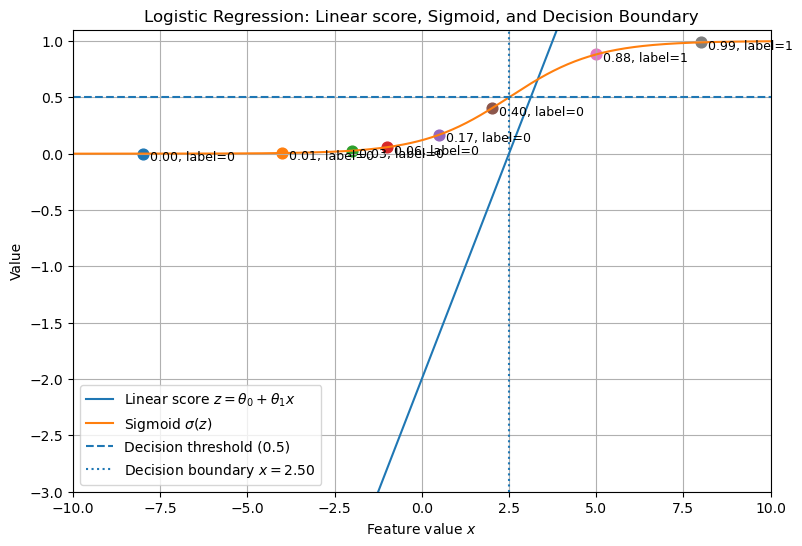

In [6]:
# Generating a single plot showing the linear score z, its sigmoid, and decision boundary.
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta0 = -2.0
theta1 = 0.8

# Input range
x = np.linspace(-10, 10, 400)
z = theta0 + theta1 * x
sigmoid = 1 / (1 + np.exp(-z))

# Sample points to illustrate classification
x_samples = np.array([-8, -4, -2, -1, 0.5, 2, 5, 8])
z_samples = theta0 + theta1 * x_samples
probs_samples = 1 / (1 + np.exp(-z_samples))
labels = (probs_samples >= 0.5).astype(int)

plt.figure(figsize=(9,6))
plt.plot(x, z, label='Linear score $z=\\theta_0+\\theta_1 x$')
plt.plot(x, sigmoid, label='Sigmoid $\\sigma(z)$')
plt.axhline(0.5, linestyle='--', label='Decision threshold (0.5)')
# Decision boundary where z = 0 -> x = -theta0/theta1
x_boundary = -theta0 / theta1
plt.axvline(x_boundary, linestyle=':', label=f'Decision boundary $x={x_boundary:.2f}$')

# Plot sample points and their probabilities
for xi, pi, li in zip(x_samples, probs_samples, labels):
    plt.scatter([xi], [pi], s=60)
    plt.text(xi + 0.2, pi - 0.06, f'{pi:.2f}, label={li}', fontsize=9)

plt.xlabel('Feature value $x$')
plt.ylabel('Value')
plt.title('Logistic Regression: Linear score, Sigmoid, and Decision Boundary')
plt.legend()
plt.grid(True)
plt.ylim(-3, 1.1)
plt.xlim(x.min(), x.max())
plt.show()


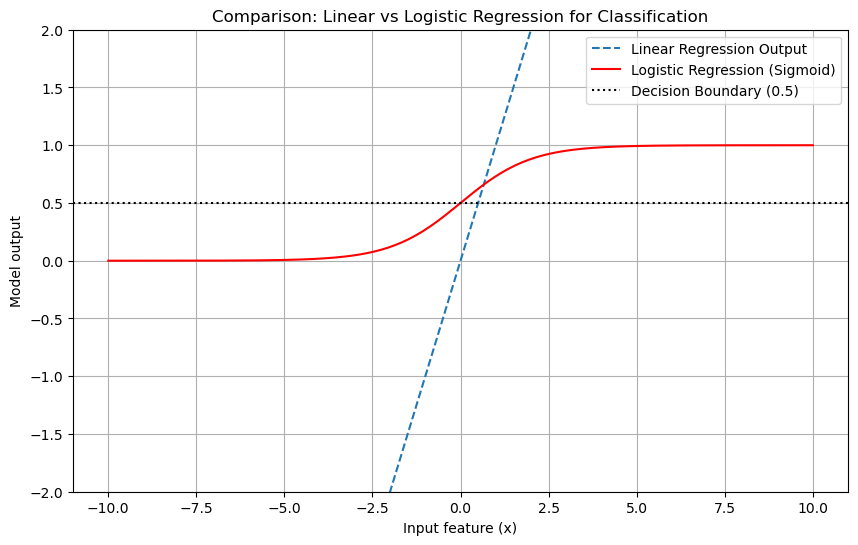

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input data
x = np.linspace(-10, 10, 200)

# Linear regression output
linear_output = x  # straight line

# Logistic regression output (sigmoid)
sigmoid_output = 1 / (1 + np.exp(-x))

# Plot comparison
plt.figure(figsize=(10,6))
plt.plot(x, linear_output, label="Linear Regression Output", linestyle="--")
plt.plot(x, sigmoid_output, label="Logistic Regression (Sigmoid)", color="red")

# Mark decision boundary at 0.5 for logistic regression
plt.axhline(0.5, color="black", linestyle=":", label="Decision Boundary (0.5)")

# Formatting
plt.ylim(-2, 2)
plt.xlabel("Input feature (x)")
plt.ylabel("Model output")
plt.title("Comparison: Linear vs Logistic Regression for Classification")
plt.legend()
plt.grid(True)
plt.show()
